In [1]:
import geopandas as gpd
import rasterio
import numpy as np
from rasterio.features import geometry_mask
from shapely.geometry import box


In [27]:
# Load the vector data
gpkg_path = r"C:\Users\bsf31\Documents\post-meds\data\policy-data\consolidated_data_q1.gpkg"
vector_layers = {f"area_autorizada_dissolved_{year}": gpd.read_file(gpkg_path, layer=f"area_autorizada_dissolved_{year}") for year in range(2001, 2023)}

In [30]:
# Load the raster data
raster_path = r"C:\Users\bsf31\Documents\post-meds\data\policy-data\raw-hansen\hansen_processed\hansen_22_masked_10_above.tif"
raster_data = rasterio.open(raster_path)

In [31]:
# Function to calculate deforested area in hectares based on pixel count
def calculate_deforested_area(vector_layer, raster_data, year):
    # Ensure the vector layer is in the same CRS as the raster data (EPSG:4326)
    vector_layer = vector_layer.to_crs(raster_data.crs)
    
    # Create a mask for the vector layer
    shapes = ((geom, 1) for geom in vector_layer.geometry)
    mask = geometry_mask(shapes, transform=raster_data.transform, invert=True, out_shape=raster_data.shape)
    
    # Read the raster data as an array
    raster_array = raster_data.read(1)
    
    # Mask the raster data with the vector mask
    masked_raster = np.where(mask, raster_array, 0)
    
    # Calculate the number of deforested pixels for the given year
    deforested_pixels = np.sum(masked_raster == year - 2000)
    
    # Calculate the area of deforested pixels (each pixel is 30m x 30m)
    pixel_area = 30 * 30  # Area of one pixel in square meters
    deforested_area_ha = (deforested_pixels * pixel_area) / 10000  # Convert to hectares
    
    return deforested_area_ha

In [33]:
# Calculate deforested areas and remaining authorized areas for each year
results = []
total_authorized_area = None

for year in range(2001, 2023):
    vector_layer = vector_layers[f"area_autorizada_dissolved_{year}"]
    
    # Calculate total authorized area
    
    # Reproject to UTM for accurate area calculation
    vector_layer_projected = vector_layer.to_crs("EPSG:32721")
    total_authorized_area = vector_layer_projected.geometry.area.sum() / 10000  # Convert to hectares
    
    # Calculate deforested area using pixel count in EPSG:4326
    deforested_area_ha = calculate_deforested_area(vector_layer, raster_data, year)
    
    # Calculate remaining authorized area
    remaining_authorized_area_ha = total_authorized_area - deforested_area_ha
    
    results.append({
        'year': year,
        'total_authorized_area': total_authorized_area,
        'deforested_area_ha': deforested_area_ha,
        'remaining_authorized_area_ha': remaining_authorized_area_ha
    })

# Print the results
for result in results:
    print(f"Year: {result['year']}, 'Total Authorized Area:' {result['total_authorized_area']}, Deforested Area: {result['deforested_area_ha']} ha, Remaining Authorized Area: {result['remaining_authorized_area_ha']} ha")


Year: 2001, 'Total Authorized Area:' 249272.00981332388, Deforested Area: 9323.64 ha, Remaining Authorized Area: 239948.3698133239 ha
Year: 2002, 'Total Authorized Area:' 298121.5666119382, Deforested Area: 12057.39 ha, Remaining Authorized Area: 286064.17661193816 ha
Year: 2003, 'Total Authorized Area:' 416239.49871513294, Deforested Area: 17800.11 ha, Remaining Authorized Area: 398439.38871513295 ha
Year: 2004, 'Total Authorized Area:' 536718.6194579282, Deforested Area: 20098.17 ha, Remaining Authorized Area: 516620.44945792825 ha
Year: 2005, 'Total Authorized Area:' 660347.3857867914, Deforested Area: 45238.41 ha, Remaining Authorized Area: 615108.9757867914 ha
Year: 2006, 'Total Authorized Area:' 873069.4509041498, Deforested Area: 29596.95 ha, Remaining Authorized Area: 843472.5009041498 ha
Year: 2007, 'Total Authorized Area:' 928999.3628014275, Deforested Area: 84465.9 ha, Remaining Authorized Area: 844533.4628014275 ha
Year: 2008, 'Total Authorized Area:' 1228477.8637532725, De

In [34]:
import matplotlib.pyplot as plt


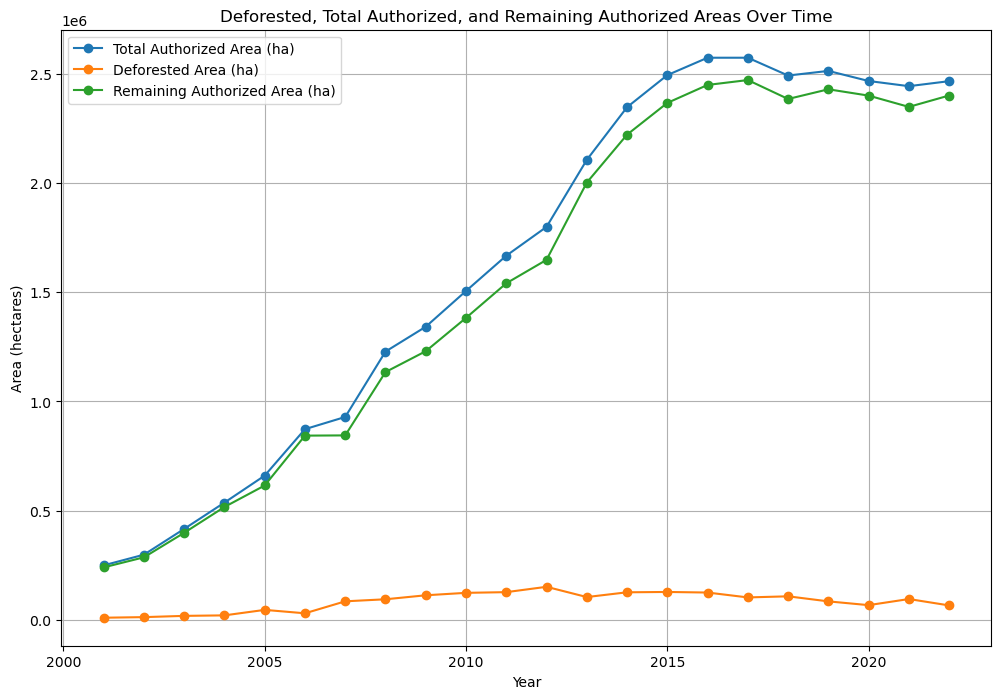

In [36]:
# Extract data for visualization
years = [result['year'] for result in results]
total_authorized_areas = [result['total_authorized_area'] for result in results]
deforested_areas = [result['deforested_area_ha'] for result in results]
remaining_areas = [result['remaining_authorized_area_ha'] for result in results]

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(years, total_authorized_areas, label='Total Authorized Area (ha)', marker='o')
plt.plot(years, deforested_areas, label='Deforested Area (ha)', marker='o')
plt.plot(years, remaining_areas, label='Remaining Authorized Area (ha)', marker='o')
plt.xlabel('Year')
plt.ylabel('Area (hectares)')
plt.title('Deforested, Total Authorized, and Remaining Authorized Areas Over Time')
plt.legend()
plt.grid(True)
plt.show()

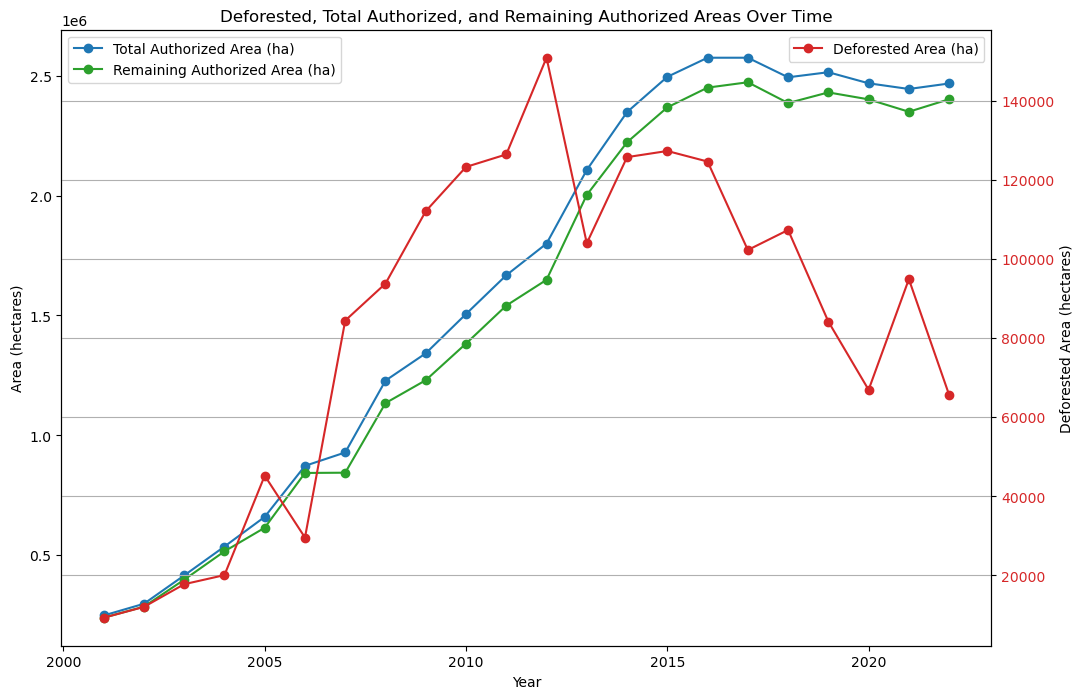

In [37]:
# Extract data for visualization
years = [result['year'] for result in results]
total_authorized_areas = [result['total_authorized_area'] for result in results]
deforested_areas = [result['deforested_area_ha'] for result in results]
remaining_areas = [result['remaining_authorized_area_ha'] for result in results]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total authorized and remaining authorized areas on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Area (hectares)')
ax1.plot(years, total_authorized_areas, label='Total Authorized Area (ha)', marker='o', color='tab:blue')
ax1.plot(years, remaining_areas, label='Remaining Authorized Area (ha)', marker='o', color='tab:green')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the deforested area
ax2 = ax1.twinx()
ax2.set_ylabel('Deforested Area (hectares)')
ax2.plot(years, deforested_areas, label='Deforested Area (ha)', marker='o', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Add a title
plt.title('Deforested, Total Authorized, and Remaining Authorized Areas Over Time')

# Show the plot
plt.grid(True)
plt.show()

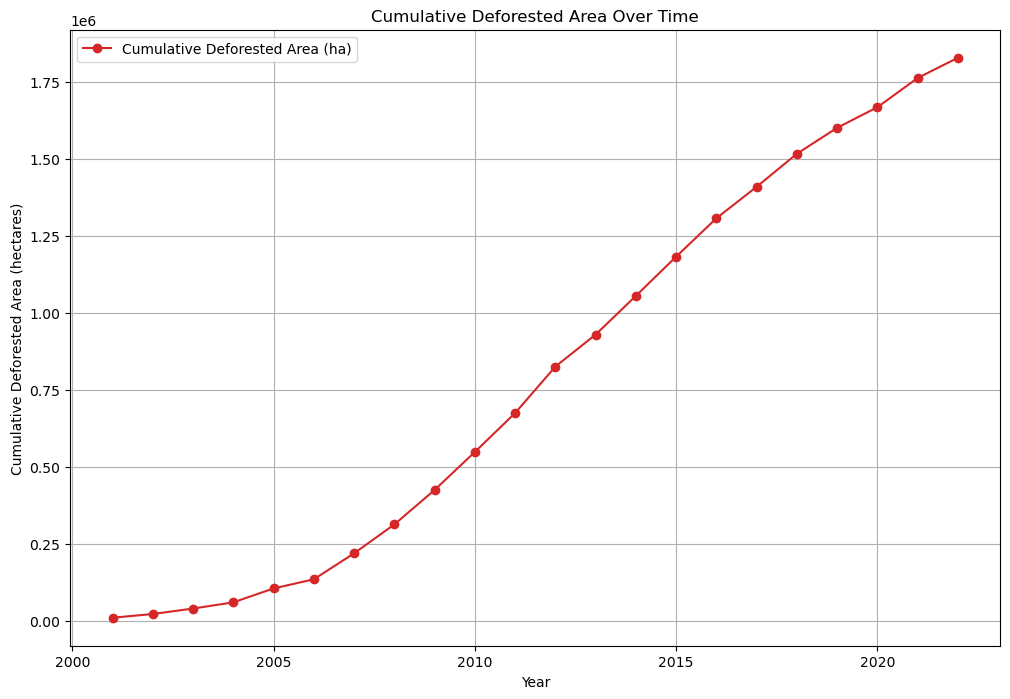

In [38]:


# Extract data for visualization
years = [result['year'] for result in results]
deforested_areas = [result['deforested_area_ha'] for result in results]

# Calculate cumulative deforested area
cumulative_deforested_areas = np.cumsum(deforested_areas)

# Plot the cumulative deforested area
plt.figure(figsize=(12, 8))
plt.plot(years, cumulative_deforested_areas, label='Cumulative Deforested Area (ha)', marker='o', color='tab:red')
plt.xlabel('Year')
plt.ylabel('Cumulative Deforested Area (hectares)')
plt.title('Cumulative Deforested Area Over Time')
plt.legend()
plt.grid(True)
plt.show()


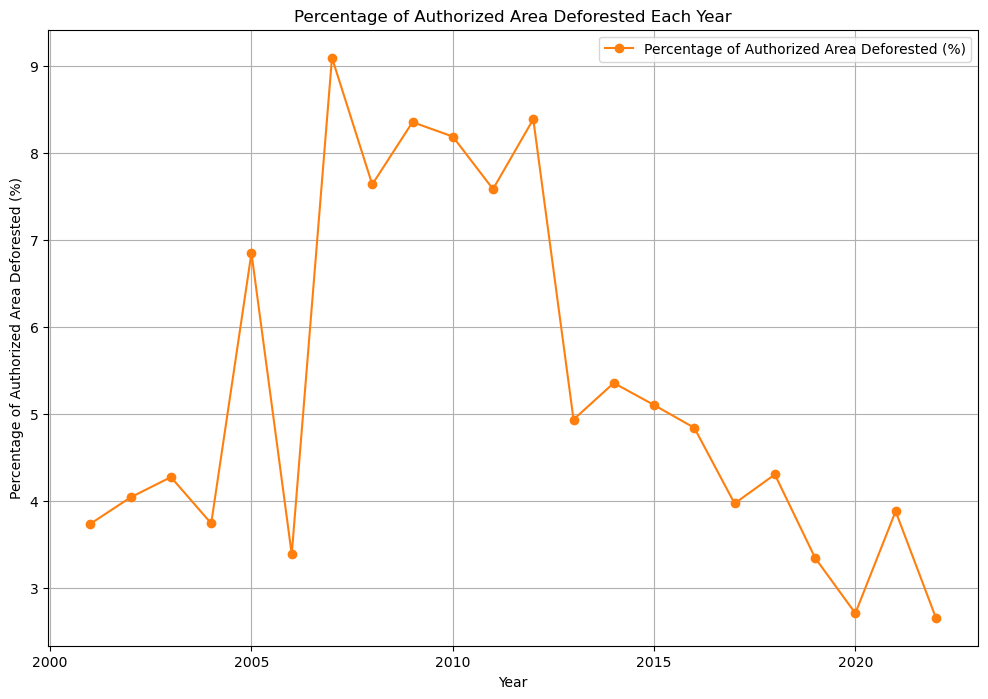

In [40]:
# Extract data for visualization
years = [result['year'] for result in results]
deforested_areas = [result['deforested_area_ha'] for result in results]
total_authorized_areas = [result['total_authorized_area'] for result in results]

# Calculate the percentage of the authorized area deforested each year
percentage_deforested = [(deforested / total_authorized) * 100 for deforested, total_authorized in zip(deforested_areas, total_authorized_areas)]

# Plot the percentage deforested each year
plt.figure(figsize=(12, 8))
plt.plot(years, percentage_deforested, label='Percentage of Authorized Area Deforested (%)', marker='o', color='tab:orange')
plt.xlabel('Year')
plt.ylabel('Percentage of Authorized Area Deforested (%)')
plt.title('Percentage of Authorized Area Deforested Each Year')
plt.legend()
plt.grid(True)
plt.show()

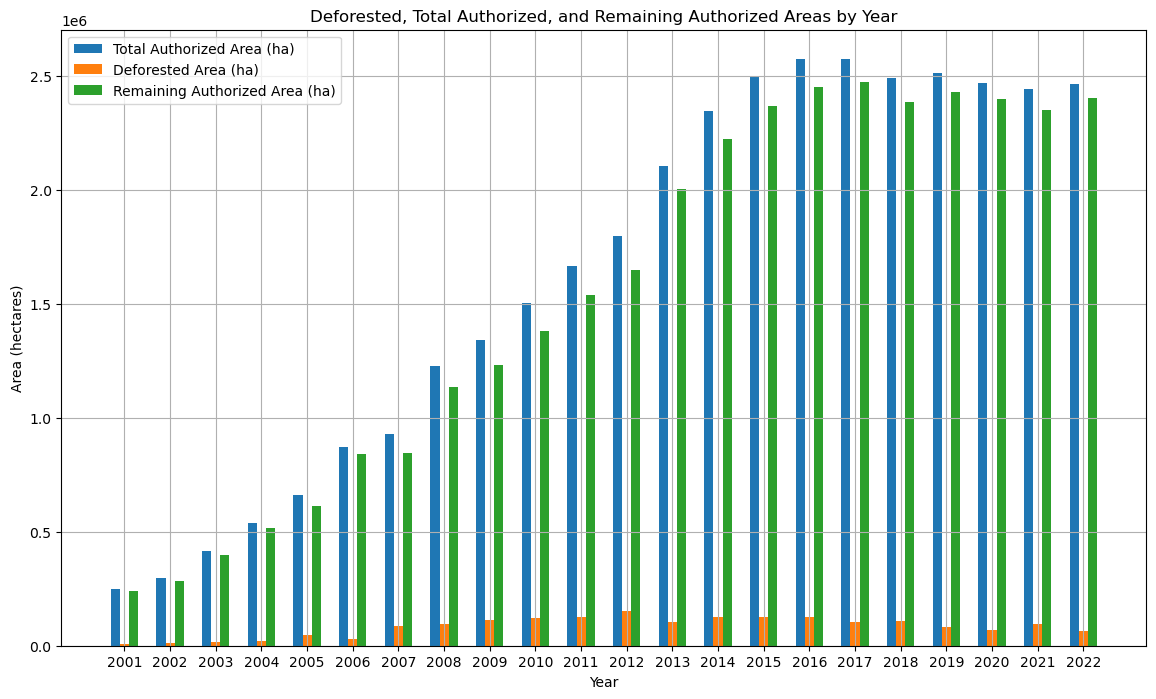

In [41]:
# Extract data for visualization
years = [result['year'] for result in results]
total_authorized_areas = [result['total_authorized_area'] for result in results]
deforested_areas = [result['deforested_area_ha'] for result in results]
remaining_areas = [result['remaining_authorized_area_ha'] for result in results]

# Set up the bar plot
x = np.arange(len(years))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width, total_authorized_areas, width, label='Total Authorized Area (ha)')
bars2 = ax.bar(x, deforested_areas, width, label='Deforested Area (ha)')
bars3 = ax.bar(x + width, remaining_areas, width, label='Remaining Authorized Area (ha)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('Area (hectares)')
ax.set_title('Deforested, Total Authorized, and Remaining Authorized Areas by Year')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

In [42]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [43]:
# Extract data for visualization
years = [result['year'] for result in results]
total_authorized_areas = [result['total_authorized_area'] for result in results]
deforested_areas = [result['deforested_area_ha'] for result in results]
remaining_areas = [result['remaining_authorized_area_ha'] for result in results]

# Create traces
trace1 = go.Scatter(x=years, y=total_authorized_areas, mode='lines+markers', name='Total Authorized Area (ha)')
trace2 = go.Scatter(x=years, y=deforested_areas, mode='lines+markers', name='Deforested Area (ha)', yaxis='y2')
trace3 = go.Scatter(x=years, y=remaining_areas, mode='lines+markers', name='Remaining Authorized Area (ha)')

# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(trace1, secondary_y=False)
fig.add_trace(trace2, secondary_y=True)
fig.add_trace(trace3, secondary_y=False)

# Add figure title and axis labels
fig.update_layout(
    title_text="Deforested, Total Authorized, and Remaining Authorized Areas Over Time",
    xaxis_title="Year",
    yaxis_title="Total and Remaining Authorized Area (ha)",
    yaxis2_title="Deforested Area (ha)"
)

# Show plot
fig.show()

In [44]:
vector_layers = {f"bosques_dissolved_{year}": gpd.read_file(gpkg_path, layer=f"bosques_dissolved_{year}") for year in range(2001, 2023)}

In [10]:
# Function to calculate deforested area in hectares based on pixel count
def calculate_deforested_area(vector_layer, raster_data, year):
    # Ensure the vector layer is in the same CRS as the raster data (EPSG:4326)
    vector_layer = vector_layer.to_crs(raster_data.crs)
    
    total_deforested_area_ha = 0
    
    # Filter for "AREA_AUTORIZADA"
    area_autorizada_layer = vector_layer[vector_layer["grupo"] == "BOSQUES"]
    
    # Iterate over each polygon in the filtered vector layer
    for _, row in area_autorizada_layer.iterrows():
        geom = row['geometry']
        
        # Create a mask for the current polygon
        shapes = [(geom, 1)]
        mask = geometry_mask(shapes, transform=raster_data.transform, invert=True, out_shape=raster_data.shape)
        
        # Read the raster data as an array
        raster_array = raster_data.read(1)
        
        # Mask the raster data with the polygon mask
        masked_raster = np.where(mask, raster_array, 0)
        
        # Calculate the number of deforested pixels for the given year
        deforested_pixels = np.sum(masked_raster == year - 2000)
        
        # Calculate the area of deforested pixels (each pixel is 30m x 30m)
        pixel_area = 30 * 30  # Area of one pixel in square meters
        deforested_area_ha = (deforested_pixels * pixel_area) / 10000  # Convert to hectares
        
        total_deforested_area_ha += deforested_area_ha
    
    return total_deforested_area_ha

In [ ]:
# Calculate deforested areas and remaining authorized areas for each year
results_bosques = []

for year in range(2001, 2023):
    vector_layer = vector_layers[f"bosques_dissolved_{year}"]
    
    # Calculate total authorized area
    
    # Reproject to UTM for accurate area calculation
    vector_layer_projected = vector_layer.to_crs("EPSG:32721")
    total_protected_area = vector_layer_projected.geometry.area.sum() / 10000  # Convert to hectares
    
    # Calculate deforested area using pixel count in EPSG:4326
    deforested_area_ha = calculate_deforested_area(vector_layer, raster_data, year)
    
    # Calculate remaining authorized area
    remaining_protected_area_ha = total_protected_area - deforested_area_ha
    
    results_bosques.append({
        'year': year,
        'total_protected_area': total_protected_area,
        'deforested_area_ha': deforested_area_ha,
        'remaining_protected_area_ha': remaining_protected_area_ha
    })

for result in results_bosques:
    print(f"Year: {result['year']}, 'Total Protected Area:' {result['total_protected_area']}, Deforested Area: {result['deforested_area_ha']} , Remaining Protected  Area: {result['remaining_protected_area_ha']} ha")

Year: 2001, 'Total Protected Area:' 285989.11050118343, Deforested Area: 4659.12 , Remaining Protected  Area: 281329.99050118343 ha
Year: 2002, 'Total Protected Area:' 348510.81934480346, Deforested Area: 7878.24 , Remaining Protected  Area: 340632.57934480347 ha
Year: 2003, 'Total Protected Area:' 482931.69277345313, Deforested Area: 11626.92 , Remaining Protected  Area: 471304.77277345315 ha
Year: 2004, 'Total Protected Area:' 635284.8145952, Deforested Area: 8605.08 , Remaining Protected  Area: 626679.7345952 ha
Year: 2005, 'Total Protected Area:' 793911.5511568208, Deforested Area: 18273.06 , Remaining Protected  Area: 775638.4911568208 ha
Year: 2006, 'Total Protected Area:' 1048495.4669201807, Deforested Area: 12973.14 , Remaining Protected  Area: 1035522.3269201807 ha
Year: 2007, 'Total Protected Area:' 1105230.0441172915, Deforested Area: 33079.77 , Remaining Protected  Area: 1072150.2741172914 ha
Year: 2008, 'Total Protected Area:' 1394723.7194059375, Deforested Area: 41754.42 

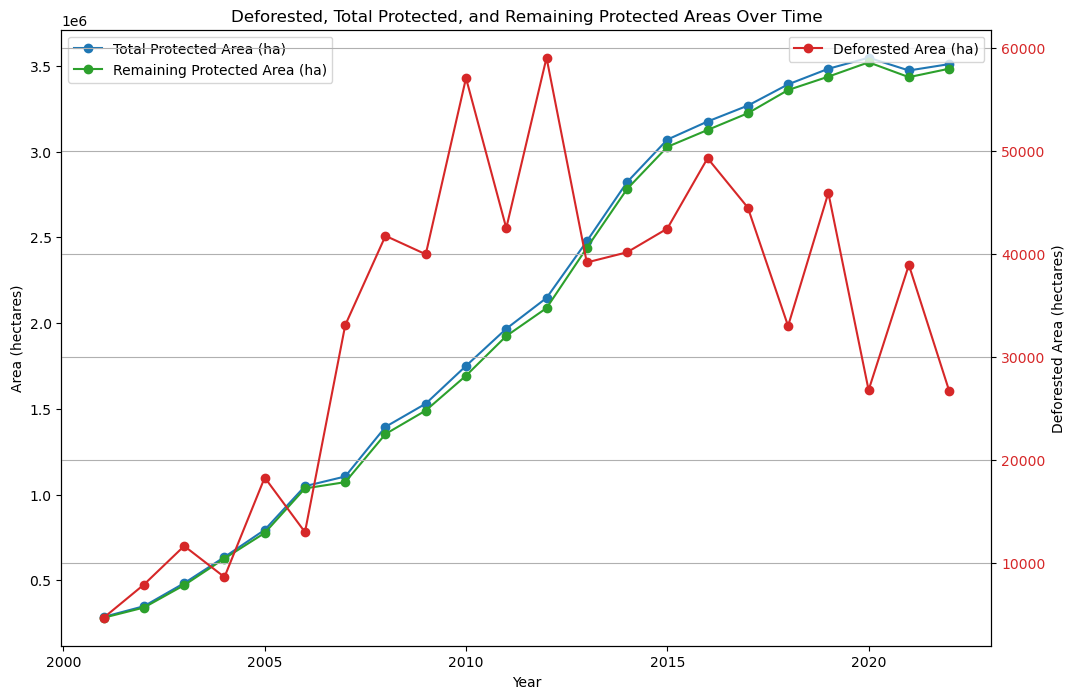

In [50]:


# Extract data for visualization
years = [result['year'] for result in results_bosques]
total_protected_areas = [result['total_protected_area'] for result in results_bosques]
deforested_areas = [result['deforested_area_ha'] for result in results_bosques]
remaining_areas = [result['remaining_protected_area_ha'] for result in results_bosques]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total protected and remaining protected areas on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Area (hectares)')
ax1.plot(years, total_protected_areas, label='Total Protected Area (ha)', marker='o', color='tab:blue')
ax1.plot(years, remaining_areas, label='Remaining Protected Area (ha)', marker='o', color='tab:green')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the deforested area
ax2 = ax1.twinx()
ax2.set_ylabel('Deforested Area (hectares)')
ax2.plot(years, deforested_areas, label='Deforested Area (ha)', marker='o', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Add a title
plt.title('Deforested, Total Protected, and Remaining Protected Areas Over Time')

# Show the plot
plt.grid(True)
plt.show()


In [16]:
for year in years:
    print(year)
    # Read the active_lup layer for the current year
    active_lup = gpd.read_file(gpkg_path, layer=f"active_lup_{year}")
    
    # Reproject the active_lup layer to match the CRS of the other layers
    active_lup = active_lup.to_crs('EPSG:4326')
    
    # Read the lup layer
    lup = gpd.read_file(gpkg_path, layer="lup")
    
    # Filter the lup layer based on the active_lup layer
    active_lup_ids = active_lup["put_id"].unique()
    lup_filtered = lup[lup["put_id"].isin(active_lup_ids)]

    output_file= f"lup_{year}"
    # Save the filtered lup layer as a separate file for each year
    lup_filtered.to_file(gpkg_path, layer=output_file, driver="GPKG")
    print(f"Saved {output_file}")

2001
Saved lup_2001
2002
Saved lup_2002
2003
Saved lup_2003
2004
Saved lup_2004
2005
Saved lup_2005
2006
Saved lup_2006
2007
Saved lup_2007
2008
Saved lup_2008
2009
Saved lup_2009
2010
Saved lup_2010
2011
Saved lup_2011
2012
Saved lup_2012
2013
Saved lup_2013
2014
Saved lup_2014
2015
Saved lup_2015
2016
Saved lup_2016
2017
Saved lup_2017
2018
Saved lup_2018
2019
Saved lup_2019
2020
Saved lup_2020
2021
Saved lup_2021
2022
Saved lup_2022


In [24]:
# Load the raster data
with rasterio.open(raster_path) as raster_data:
    raster_array = raster_data.read(1)
    raster_transform = raster_data.transform
    raster_crs = raster_data.crs
    raster_shape = raster_data.shape
    pixel_area = 30 * 30  # Area of one pixel in square meters

# List of years for which to process the data
years = range(2001, 2023)

# Initialize a list to store the results
results = []
total_authorized_area = None

# Process each year
for year in years:
    print(year)

    # Read the pre-filtered lup layer for the current year
    vector_layer = gpd.read_file(gpkg_path, layer=f"lup_{year}")

    # Filter for "AREA_AUTORIZADA"
    area_autorizada_layer = vector_layer[vector_layer["grupo"] == "AREA_AUTORIZADA"]
    area_autorizada_layer = area_autorizada_layer.to_crs(raster_crs)

    # Calculate total authorized area for "AREA_AUTORIZADA" (only once)
    if total_authorized_area is None:
        area_autorizada_projected = area_autorizada_layer.to_crs("EPSG:32721")
        total_authorized_area = area_autorizada_projected.geometry.area.sum() / 10000  # Convert to hectares

    # Create a mask for the "AREA_AUTORIZADA" layer
    shapes = ((geom, 1) for geom in area_autorizada_layer.geometry)
    mask = geometry_mask(shapes, transform=raster_transform, invert=True, out_shape=raster_shape)

    # Mask the raster array with the vector mask
    masked_raster = np.where(mask, raster_array, 0)

    # Calculate the number of deforested pixels for the given year
    deforested_pixels = np.sum(masked_raster == (year - 2000))

    # Calculate the area of deforested pixels and convert to hectares
    deforested_area_ha = (deforested_pixels * pixel_area) / 10000

    # Calculate remaining authorized area
    remaining_authorized_area_ha = total_authorized_area - deforested_area_ha

    print('append')
    results.append({
        'year': year,
        'deforested_area_ha': deforested_area_ha,
        'remaining_authorized_area_ha': remaining_authorized_area_ha
    })
# Print the results
for result in results:
    print(f"Year: {result['year']},  Deforested Area: {result['deforested_area_ha']} ha, Remaining Authorized Area: {result['remaining_authorized_area_ha']} ha")

2001
append
2002
append
2003
append
2004
append
2005
append
2006
append
2007
append
2008
append
2009
append
2010
append
2011
append
2012
append
2013
append
2014
append
2015
append
2016
append
2017
append
2018
append
2019
append
2020
append
2021
append
2022
append
Year: 2001,  Deforested Area: 9323.64 ha, Remaining Authorized Area: 239951.81427142577 ha
Year: 2002,  Deforested Area: 12057.39 ha, Remaining Authorized Area: 237218.06427142577 ha
Year: 2003,  Deforested Area: 17800.11 ha, Remaining Authorized Area: 231475.3442714258 ha
Year: 2004,  Deforested Area: 20098.17 ha, Remaining Authorized Area: 229177.2842714258 ha
Year: 2005,  Deforested Area: 45238.41 ha, Remaining Authorized Area: 204037.04427142578 ha
Year: 2006,  Deforested Area: 29596.95 ha, Remaining Authorized Area: 219678.50427142577 ha
Year: 2007,  Deforested Area: 84465.9 ha, Remaining Authorized Area: 164809.5542714258 ha
Year: 2008,  Deforested Area: 93816.9 ha, Remaining Authorized Area: 155458.5542714258 ha
Year: 2

In [23]:
results

[{'year': 2001,
  'deforested_area_ha': 9323.64,
  'remaining_authorized_area_ha': 239951.81427142577},
 {'year': 2002,
  'deforested_area_ha': 12057.39,
  'remaining_authorized_area_ha': 237218.06427142577},
 {'year': 2003,
  'deforested_area_ha': 17800.11,
  'remaining_authorized_area_ha': 231475.3442714258},
 {'year': 2004,
  'deforested_area_ha': 20098.17,
  'remaining_authorized_area_ha': 229177.2842714258},
 {'year': 2005,
  'deforested_area_ha': 45238.41,
  'remaining_authorized_area_ha': 204037.04427142578}]

In [18]:
total_authorized_area

249275.45427142578

In [19]:
results

[{'year': 2001,
  'total_authorized_area': 249275.45427142578,
  'deforested_area_ha': 9323.639999999996,
  'remaining_authorized_area_ha': 239951.8142714258}]

In [17]:
# List of years for which to process the data
years = range(2001, 2004)

# Initialize a dictionary to store the results
results = []
total_authorized_area = None

for year in years:
    print(year)
    # Read the pre-filtered lup layer for the current year
    vector_layer = gpd.read_file(gpkg_path, layer=f"lup_{year}")
    
    # Calculate total authorized area for "AREA_AUTORIZADA" (only once)
    if total_authorized_area is None:
        # Filter for "AREA_AUTORIZADA"
        area_autorizada_layer = vector_layer[vector_layer["grupo"] == "AREA_AUTORIZADA"]
        
        # Reproject to UTM for accurate area calculation
        area_autorizada_projected = area_autorizada_layer.to_crs("EPSG:32721")
        total_authorized_area = area_autorizada_projected.geometry.area.sum() / 10000  # Convert to hectares
    print('calculate_deforested_area')
    # Calculate deforested area using pixel count in EPSG:4326 for "AREA_AUTORIZADA"
    deforested_area_ha = calculate_deforested_area(vector_layer, raster_data, year)
    print('remaining_authorized_area_ha')
    # Calculate remaining authorized area
    remaining_authorized_area_ha = total_authorized_area - deforested_area_ha
    print('append')
    results.append({
        'year': year,
        'total_authorized_area': total_authorized_area,
        'deforested_area_ha': deforested_area_ha,
        'remaining_authorized_area_ha': remaining_authorized_area_ha
    })
    print(f"Year: {result['year']}, 'Total Authorized Area:', {result['total_authorized_area']},  Deforested Area: {result['deforested_area_ha']} ha, Remaining Authorized Area: {result['remaining_authorized_area_ha']} ha")
# Print the results
for result in results:
    print(f"Year: {result['year']}, 'Total Authorized Area:', {result['total_authorized_area']},  Deforested Area: {result['deforested_area_ha']} ha, Remaining Authorized Area: {result['remaining_authorized_area_ha']} ha")

2001
calculate_deforested_area
remaining_authorized_area_ha
append


KeyError: 'total_authorized_area'